In [1]:
import keras
import numpy as np 
import os 
import h5py
import pandas as pd
from keras.utils import np_utils
from matplotlib import pyplot as plt


Using TensorFlow backend.


In [2]:
def read_h5(filename):
    f = h5py.File(filename, 'r')
    images = np.array(f['images'])
    shapes = np.array(f['shapes'])
    dataset = []
    for i in range(len(images)):
        dataset.append(images[i].reshape(shapes[i]))
    return dataset

In [3]:
def initialize_data(dataset_dir):
    train_dataset_filename = os.path.join(dataset_dir, 'train_dataset', 'dataset.h5')
    valid_dataset_filename = os.path.join(dataset_dir, 'valid_dataset', 'dataset.h5')
    test_dataset_filename = os.path.join(dataset_dir, 'test_dataset', 'dataset.h5')
    
    train_labels_filename = os.path.join(dataset_dir, 'train_dataset', 'label.csv')
    valid_labels_filename = os.path.join(dataset_dir, 'valid_dataset', 'label.csv')
    test_labels_filename = os.path.join(dataset_dir, 'test_dataset', 'label.csv')
    
    train_dataset = read_h5(train_dataset_filename)
    valid_dataset = read_h5(valid_dataset_filename)
    test_dataset = read_h5(test_dataset_filename)
    
    train_labels = pd.read_csv(train_labels_filename)
    valid_labels = pd.read_csv(valid_labels_filename)
    test_labels = pd.read_csv(test_labels_filename)
    
    return train_dataset, valid_dataset, test_dataset, train_labels, valid_labels, test_labels

In [5]:
"""
Initialize data
SHAPE 
dataset => (num_samples, height, width, 3)
labels => (num_samples, 'image_id' 
    'm_s1', 's1_1', 's1_2', 
    'm_s2', 's2_1', 's2_2', 's2_3' 's2_4', 
    'm_s3', 's3_1', 's3_2', 's3_3']
"""
root = '.'
dataset_dir = os.path.join(root, 'generated', 'create_sample_extractor_3')

train_dataset, valid_dataset, test_dataset, train_labels, valid_labels, test_labels = initialize_data(dataset_dir)

In [5]:
"""
Logitize labels
"""
from keras.utils import np_utils

train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

# Train dataset
train_logits_s0 = np_utils.to_categorical(train_labels[:, 4], 5) 
train_logits_s1 = np_utils.to_categorical(train_labels[:, 5], 11) 
train_logits_s2 = np_utils.to_categorical(train_labels[:, 6], 11) 
train_logits_s3 = np_utils.to_categorical(train_labels[:, 7], 11) 
train_logits_s4 = np_utils.to_categorical(train_labels[:, 8], 11)
train_labels_logits = np.hstack([train_logits_s0, train_logits_s1, train_logits_s2, train_logits_s3, train_logits_s4])

valid_logits_s0 = np_utils.to_categorical(valid_labels[:, 4], 5) 
valid_logits_s1 = np_utils.to_categorical(valid_labels[:, 5], 11) 
valid_logits_s2 = np_utils.to_categorical(valid_labels[:, 6], 11) 
valid_logits_s3 = np_utils.to_categorical(valid_labels[:, 7], 11) 
valid_logits_s4 = np_utils.to_categorical(valid_labels[:, 8], 11)
valid_labels_logits = np.hstack([valid_logits_s0, valid_logits_s1, valid_logits_s2, valid_logits_s3, valid_logits_s4])

test_logits_s0 = np_utils.to_categorical(test_labels[:, 4], 5) 
test_logits_s1 = np_utils.to_categorical(test_labels[:, 5], 11) 
test_logits_s2 = np_utils.to_categorical(test_labels[:, 6], 11) 
test_logits_s3 = np_utils.to_categorical(test_labels[:, 7], 11) 
test_logits_s4 = np_utils.to_categorical(test_labels[:, 8], 11)
test_labels_logits = np.hstack([test_logits_s0, test_logits_s1, test_logits_s2, test_logits_s3, test_logits_s4])

print('s0 : ', str(train_logits_s0[0]))
print('s1 : ', str(train_logits_s1[0]))
print('s3 : ', str(train_logits_s3[0]))
print('s3 : ', str(train_logits_s3[0]))
print('s4 : ', str(train_logits_s4[0]))
print('logitized : ', str(train_labels_logits[0]))

s0 :  [0. 0. 0. 1. 0.]
s1 :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
s3 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
s3 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
s4 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
logitized :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
"""
Label Decoder
Output real value from the label
e.g 'AE 2343 PY'
"""
def label_decoder(label):
    s1 = ''
    s1 += chr(label[2] + 64) if label[2] > 0 else ''
    s1 += chr(label[3] + 64) if label[3] > 0 else ''
    
    s2 = ''
    s2 += str(label[5] - 1) if label[5]-1 > -1 else ''
    s2 += str(label[6] - 1) if label[6]-1 > -1 else ''
    s2 += str(label[7] - 1) if label[7]-1 > -1 else ''
    s2 += str(label[8] - 1) if label[8]-1 > -1 else ''
    
    s3 = ''
    s3 += chr(label[10] + 64) if label[10] > 0 else '' 
    s3 += chr(label[11] + 64) if label[11] > 0 else '' 
    s3 += chr(label[12] + 64) if label[12] > 0 else ''
    
    return s1 + ' ' + s2 + ' ' + s3 

In [8]:
import cv2 as cv2
model_input_dim = (200, 61)
def image_resizer(im, dim):
    image = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    return image

In [9]:
"""
Sanity Checking
"""
i = np.random.choice(len(train_dataset))
# i = 2
plt.imshow(image_resizer(train_dataset[i], model_input_dim))
print(label_decoder(train_labels[i]))
# print(str(train_labels[i, 0:5]))
# print(str(train_labels[i, 5:16]))
# print(str(train_labels[i, 16:27]))
# print(str(train_labels[i, 27:38]))
# print(str(train_labels[i, 38:49]))
print(train_labels[i, 0])

S 6123 IQM
904.jpg


In [10]:
# print(train_labels.columns.values)
a = np.array(train_labels)
print(a[0, 4])

3


In [11]:
"""
Model backbone
"""
from keras.utils import plot_model
resnet_model = keras.applications.resnet50.ResNet50(include_top=False, weights=None, input_shape=(61, 200, 3),
                                                    pooling=None)

# plot_model(resnet_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'model.jpg'))

c:\users\satya\appdata\local\programs\python\python36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [12]:
"""
define all the callbacks
"""
from keras.callbacks import *
checkpoint_filename = 'extractor3_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5'
model_checkpoint = ModelCheckpoint(filepath=os.path.join(dataset_dir, checkpoint_filename),
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
logger_filename = 'extractor3_training_log.csv'
csv_logger = CSVLogger(filename=os.path.join(dataset_dir, logger_filename),
                       separator=',',
                       append=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=10,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=8,
                                         verbose=1,
                                         min_delta=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate]

In [13]:
train_dataset[0].shape

(98, 176, 3)

In [14]:
"""
Data Generator
"""
import random 
def generator(dataset, labels, batch_size):
    dataset = np.array(dataset)
    # Create container for features and labels
    batch_dataset = np.zeros((batch_size, 61, 200, 3))
    batch_labels = np.zeros((batch_size, 49))
    
    while True:
        for i in range(batch_size):
            ii = np.random.choice(len(dataset), 1)[0]
            batch_dataset[i] = image_resizer(dataset[ii], (200, 61))
            batch_labels[i] = labels[ii]
        yield batch_dataset, batch_labels 


In [16]:
"""
Testing Generator
"""
# type(train_dataset[0][0][0][0])
train_generator = generator(train_dataset, train_labels_logits, 10)
batch_dataset, batch_labels = next(train_generator)
sel = 0
plt.imshow(np.array(batch_dataset[sel]).astype(np.uint8))
print(str(batch_labels[sel, 0:5]))
print(str(batch_labels[sel, 5:16]))
print(str(batch_labels[sel, 16:27]))
print(str(batch_labels[sel, 27:38]))
print(str(batch_labels[sel, 38:49]))
print(batch_labels[sel])

[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [18]:
"""
Model Infrastructure
"""

from keras.layers import *
from keras.models import Model
from keras.optimizers import *

s1_input = Conv2D(name='s1_input', filters=512, kernel_size=(3, 3), padding='same')(resnet_model.layers[-1].output)
s1_conv = Conv2D(name='s1_conv', filters=128, kernel_size=(3, 3), padding='same')(s1_input)
s1_flatten = Flatten()(s1_conv)
s1_0 = Dense(name='s1_0', units=3, activation='softmax')(s1_flatten)
# s1_0_reshape = Reshape([1, 3])(s1_0)
s1_1 = Dense(name='s1_1', units=27, activation='softmax')(s1_flatten)
# s1_1_reshape = Reshape([1, 27])(s1_0)
s1_2 = Dense(name='s1_2', units=27, activation='softmax')(s1_flatten)
# s1_2_reshape = Reshape([1, 27])(s1_0)
s1_output = Concatenate()([s1_0, s1_1, s1_2])
# s1_output = Reshape([1, 3, 27])(s1_concat)

s2_input = Conv2D(name='s2_input', filters=512, kernel_size=(3, 3), padding='same')(resnet_model.layers[-1].output)
s2_conv = Conv2D(name='s2_conv', filters=128, kernel_size=(3, 3), padding='same')(s2_input)
s2_flatten = Flatten()(s2_conv)
s2_0 = Dense(name='s2_0', units=5, activation='softmax')(s2_flatten)
# s2_0_reshape = Reshape([1, 5])(s2_0)
s2_1 = Dense(name='s2_1', units=11, activation='softmax')(s2_flatten)
# s2_1_reshape = Reshape([1, 11])(s2_1)
s2_2 = Dense(name='s2_2', units=11, activation='softmax')(s2_flatten)
# s2_2_reshape = Reshape([1, 11])(s2_2)
s2_3 = Dense(name='s2_3', units=11, activation='softmax')(s2_flatten)
# s2_3_reshape = Reshape([1, 11])(s2_3)
s2_4 = Dense(name='s2_4', units=11, activation='softmax')(s2_flatten)
# s2_4_reshape = Reshape([1, 11])(s2_4)
s2_output = Concatenate()([s2_0, s2_1, s2_2, s2_3, s2_4])
# s2_concat = Concatenate()([s2_0_reshape, s2_1_reshape, s2_2_reshape, s2_3_reshape, s2_4_reshape])
# s2_output = Reshape([1, 5, 11])(s2_concat)

s3_input = Conv2D(name='s3_input', filters=512, kernel_size=(3, 3), padding='same')(resnet_model.layers[-1].output)
s3_conv = Conv2D(name='s3_conv', filters=128, kernel_size=(3, 3), padding='same')(s3_input)
s3_flatten = Flatten()(s3_conv)
s3_0 = Dense(name='s3_0', units=4, activation='softmax')(s3_flatten)
s3_1 = Dense(name='s3_1', units=27, activation='softmax')(s3_flatten)
s3_2 = Dense(name='s3_2', units=27, activation='softmax')(s3_flatten)
s3_3 = Dense(name='s3_3', units=27, activation='softmax')(s3_flatten)
s3_output = Concatenate()([s3_0, s3_1, s3_2, s3_3])
# s3_output = Reshape([1, 4, 27])(s3_concat)

# output = Concatenate(axis=-3)([s1_output, s2_output, s3_output])
new_model = Model(inputs=resnet_model.layers[0].output, output=s2_output)
plot_model(new_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'model.jpg'))


c:\users\satya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [19]:
from keras import backend as K

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.categorical_crossentropy(y_true[:, 0:2], y_pred[:, 0:2])
    loss_s1_1 = K.categorical_crossentropy(y_true[:, 3:29], y_pred[:, 3:29])
    loss_s1_2 = K.categorical_crossentropy(y_true[:, 30:57], y_pred[:, 30:57])
    
    loss_s2_0 = K.categorical_crossentropy(y_true[:, 0:4], y_pred[:, 0:4])
    loss_s2_1 = K.categorical_crossentropy(y_true[:, 5:15], y_pred[:, 5:15])
    loss_s2_2 = K.categorical_crossentropy(y_true[:, 16:26], y_pred[:, 16:26])
    loss_s2_3 = K.categorical_crossentropy(y_true[:, 27:37], y_pred[:, 27:37])
    loss_s2_4 = K.categorical_crossentropy(y_true[:, 38:48], y_pred[:, 38:48])
    
    loss_s3_0 = K.categorical_crossentropy(y_true[:, 0:3], y_pred[:, 0:3])
    loss_s3_1 = K.categorical_crossentropy(y_true[:, 4:30], y_pred[:, 4:30])
    loss_s3_2 = K.categorical_crossentropy(y_true[:, 31:57], y_pred[:, 31:57])
    loss_s3_3 = K.categorical_crossentropy(y_true[:, 58:84], y_pred[:, 58:84])
    
    loss_s1 = loss_s1_0 + loss_s1_1, loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1, loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

def number_loss(y_true, y_pred):
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, 0:5], y_pred[:, 0:5]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, 5:16], y_pred[:, 5:16]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, 16:27], y_pred[:, 16:27]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, 27:38], y_pred[:, 27:38]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, 38:49], y_pred[:, 38:49]))
    return loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4

In [20]:
from keras.optimizers import *
# adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.0001, momentum=0.8)
new_model.compile(optimizer=sgd, loss=number_loss)

In [21]:
initial_epoch = 0
final_epoch = 100
steps_per_epoch = 3000
train_generator = generator(train_dataset, train_labels_logits, 5)
val_generator = generator(valid_dataset, valid_labels_logits, 5)
history = new_model.fit_generator(generator=train_generator,
                                  steps_per_epoch=steps_per_epoch, 
                                  epochs=final_epoch, 
                                  callbacks=callbacks,
                                  validation_data=val_generator,
                                  validation_steps=600,
                                  initial_epoch=initial_epoch
                                  )

Epoch 1/100
3000/3000 [==============================] - 1464s 488ms/step - loss: 12.1768 - val_loss: 11.8584

Epoch 00001: val_loss improved from inf to 11.85841, saving model to .\generated\create_sample_extractor_3\extractor3_epoch-01_loss-12.1768_val_loss-11.8584.h5
Epoch 2/100
3000/3000 [==============================] - 1446s 482ms/step - loss: 8.2945 - val_loss: 9.2684

Epoch 00002: val_loss improved from 11.85841 to 9.26840, saving model to .\generated\create_sample_extractor_3\extractor3_epoch-02_loss-8.2945_val_loss-9.2684.h5
Epoch 3/100
3000/3000 [==============================] - 1446s 482ms/step - loss: 7.2858 - val_loss: 8.0479

Epoch 00003: val_loss improved from 9.26840 to 8.04788, saving model to .\generated\create_sample_extractor_3\extractor3_epoch-03_loss-7.2858_val_loss-8.0479.h5
Epoch 4/100
3000/3000 [==============================] - 1446s 482ms/step - loss: 6.7019 - val_loss: 8.0237

Epoch 00004: val_loss improved from 8.04788 to 8.02371, saving model to .\gener

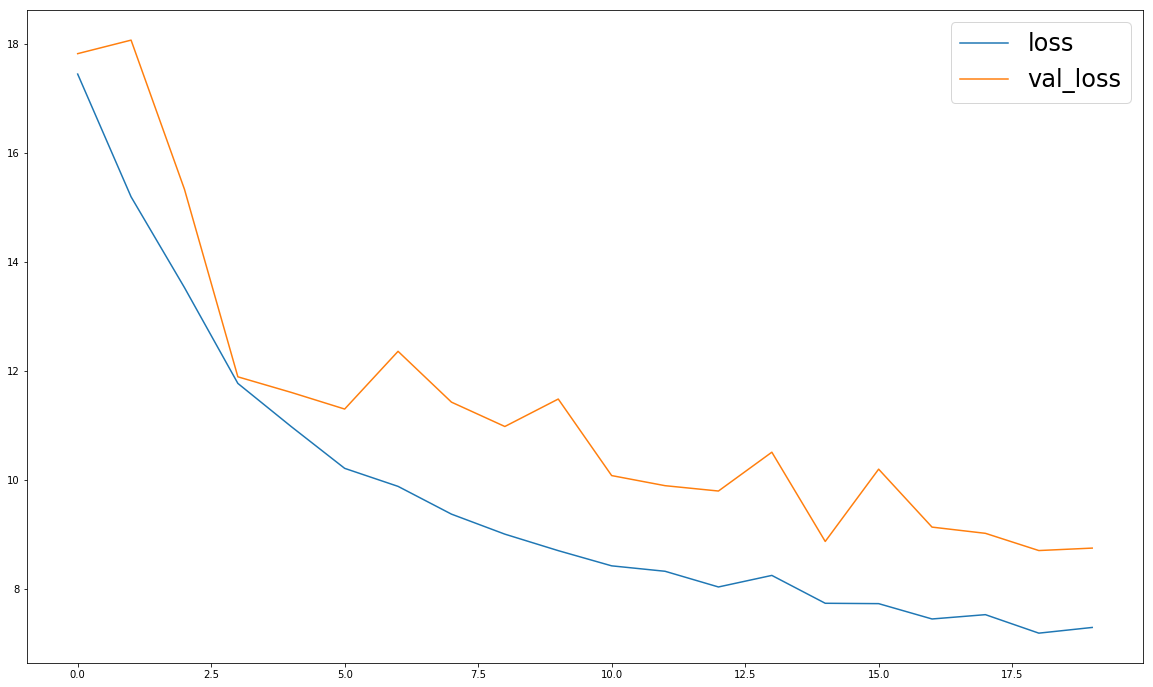

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24})

In [23]:
"""
Export Model 
"""
model_json = new_model.to_json()
with open(os.path.join(dataset_dir, 'model.json'), 'w') as f:
    f.write(model_json)
new_model.save_weights(os.path.join(dataset_dir, 'model_weights.h5'))